<a href="https://colab.research.google.com/github/MartinaJoergensen/FirstCodes/blob/master/comparion_roc_digit5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload CNN and optionally Autoencoder ROC CSV files (digit 5)


Saving autoencoder_roc_digit5.csv to autoencoder_roc_digit5 (2).csv
Saving roc_digit5.csv to roc_digit5 (2).csv
Renamed 'roc_digit5 (2).csv' -> 'roc_digit5.csv'
Renamed 'autoencoder_roc_digit5 (2).csv' -> 'autoencoder_roc_digit5.csv'


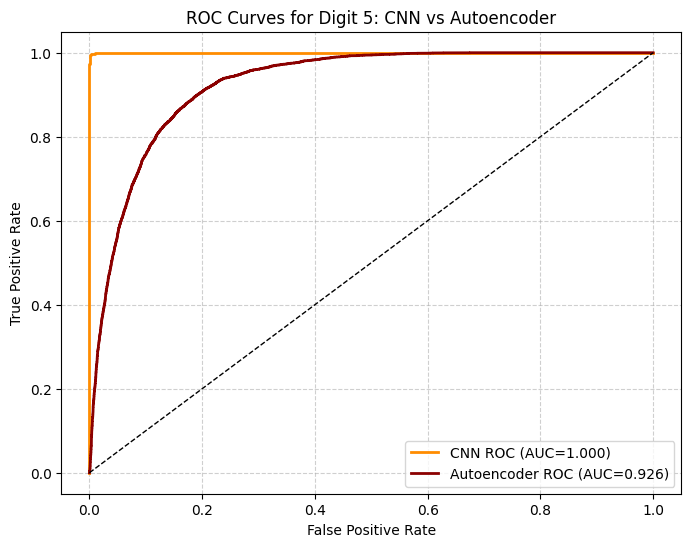

In [3]:
# -------------------------------
# Step 0: Import Libraries
# -------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import auc
from google.colab import files
import os

# -------------------------------
# Step 1: Upload CSV files
# -------------------------------
print("Upload CNN and optionally Autoencoder ROC CSV files (digit 5)")
uploaded = files.upload()  # select both CSVs

# -------------------------------
# Step 2: Normalize filenames (handle Colab automatic renames)
# -------------------------------
# Expected filenames
expected_files = {
    "cnn": "roc_digit5.csv",
    "ae": "autoencoder_roc_digit5.csv"
}

# Rename uploaded files to standard names
for key, expected_name in expected_files.items():
    for uploaded_name in uploaded.keys():
        if uploaded_name.startswith(expected_name.replace(".csv","")):
            os.rename(uploaded_name, expected_name)
            print(f"Renamed '{uploaded_name}' -> '{expected_name}'")

# -------------------------------
# Step 3: Load CSV files
# -------------------------------
# CNN ROC
if os.path.exists(expected_files["cnn"]):
    cnn_roc = pd.read_csv(expected_files["cnn"])
    fpr_cnn, tpr_cnn = cnn_roc['fpr'], cnn_roc['tpr']
else:
    raise FileNotFoundError(f"CNN CSV file '{expected_files['cnn']}' not found!")

# Autoencoder ROC (optional)
if os.path.exists(expected_files["ae"]):
    ae_roc = pd.read_csv(expected_files["ae"])
    fpr_ae, tpr_ae = ae_roc['fpr'], ae_roc['tpr']
else:
    fpr_ae = tpr_ae = None

# -------------------------------
# Step 4: Compute AUCs
# -------------------------------
roc_auc_cnn = auc(fpr_cnn, tpr_cnn)
roc_auc_ae = auc(fpr_ae, tpr_ae) if fpr_ae is not None else None

# -------------------------------
# Step 5: Plot ROC curves
# -------------------------------
plt.figure(figsize=(8,6))
plt.plot(fpr_cnn, tpr_cnn, color='darkorange', lw=2, label=f'CNN ROC (AUC={roc_auc_cnn:.3f})')

if fpr_ae is not None:
    plt.plot(fpr_ae, tpr_ae, color='darkred', lw=2, label=f'Autoencoder ROC (AUC={roc_auc_ae:.3f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Digit 5: CNN vs Autoencoder')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()